Given this [titanic](https://en.wikipedia.org/wiki/RMS_Titanic) [dataset](https://www.kaggle.com/c/titanic/data), the unifying theme is the factors that influenced survival among the passengers, directly or indirectly. I'm not ready to build a model to make predictions so we'll keep the questions descriptive.


## Questions
* What is the distribution of the passenger classes? Were there more third class passengers packed into the bowels of the ship?
* I would presume that third class passengers are likely to be emigres with families. Do third class passengers have more family members aboard?
* How are the embarkation ports ([Cherbourg](https://en.wikipedia.org/wiki/Cherbourg-Octeville), [Queenstown](https://en.wikipedia.org/wiki/Cobh), [Southamption](https://en.wikipedia.org/wiki/Southampton)) spread among the passenger classes? Before looking at this data, I didn't know that some of the passengers are French. My idiosyncratic set of biases suggests that more passengers from the French port are in first or second class.

Let's get a first look at the data by importing into a DataFrame.

In [1]:
import numpy as np
import pandas as pd

titanic_df = pd.read_csv('C:\\Users\\Nathan\\Dropbox\\study\\udacity\\DAND\\project2\\titanic_data.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


Let's get some first looks at [frequency tables](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.Series.value_counts.html) and [histograms](http://matplotlib.org/1.4.1/api/pyplot_api.html#matplotlib.pyplot.hist) for passenger class, gender, and age in case something demographically strange is happening. I'll store their columns in variables since I'll reuse them. I found [this discussion](https://discussions.udacity.com/t/histogram-add-labels-remove-axis-ticks-titles/44004/14) helpful for creating my histograms.

In [2]:
passenger_class = titanic_df['Pclass']
passenger_sex = titanic_df['Sex']
passenger_age = titanic_df['Age']
passenger_class.head()

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64


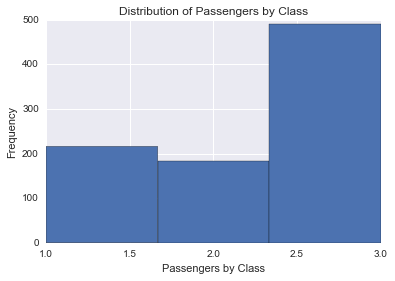

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

print passenger_class.value_counts()

plt.hist(passenger_class, bins=3)
plt.xlabel('Passengers by Class')
plt.ylabel('Frequency')
plt.title('Distribution of Passengers by Class')
plt.show()

Lo and behold, this shows that the number of third class passengers more than doubled those of first or second class. This obviously doesn't serve as direct evidence that third class passengers were packed like sardines, or even uncomfortably, but it is suggestive.

male      577
female    314
Name: Sex, dtype: int64


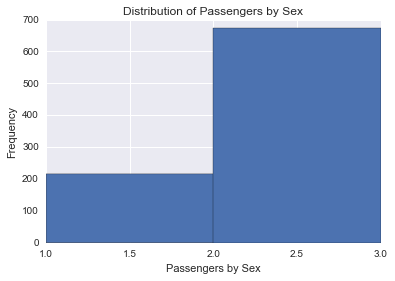

In [69]:
print passenger_sex.value_counts()

plt.hist(passenger_class, bins=2)
plt.xlabel('Passengers by Sex')
plt.ylabel('Frequency')
plt.title('Distribution of Passengers by Sex')
plt.show()

Now here I have a discrepency between my counts of males and females and what my histogram shows. My histogram is showing more males and fewer females than it should.

My intuition reports that young males are more likely to immigrate, especially if they don't have a spouse or children.

Let's take a look at the ages of the passengers. This data has a couple issues:
1. NaN values
2. Decimal values for some ages

So let's clean up the column before describing the data.

In [49]:
print "Number of passengers: " + str(len(passenger_age))
passenger_age_without_na = passenger_age.dropna()
print "Number of passengers with known ages: " + str(len(passenger_age_without_na))
print "Number of passengers with unknown ages: " + str(len(passenger_age) - len(passenger_age_without_na))

Number of passengers: 891
Number of passengers with known ages: 714
Number of passengers with unknown ages: 177


I identified a range of the column that had some decimal values by viewing the spreadsheet.

In [46]:
print passenger_age_without_na[120:130]
print
passenger_age_without_na_and_rounded = passenger_age_without_na.round()
print passenger_age_without_na_and_rounded[120:130]

149    42.0
150    51.0
151    22.0
152    55.5
153    40.5
155    51.0
156    16.0
157    30.0
160    44.0
161    40.0
Name: Age, dtype: float64

149    42
150    51
151    22
152    56
153    40
155    51
156    16
157    30
160    44
161    40
Name: Age, dtype: float64


Now that the column is cleaned up using [dropna](http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.Series.dropna.html) and [round](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.round.html), it's time to take a descriptive view. Since this data is numerical, a [boxplot](http://matplotlib.org/examples/pylab_examples/boxplot_demo.html) may be illuminating.

In [57]:
passenger_age_without_na_and_rounded.describe()

count    714.000000
mean      29.693277
std       14.524527
min        0.000000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

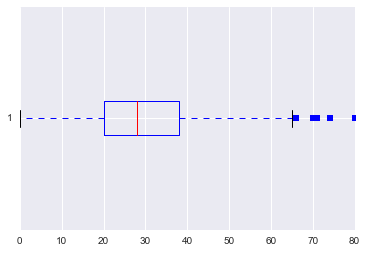

In [62]:
plt.boxplot(passenger_age_without_na_and_rounded, 0, 'rs', 0)
plt.show()

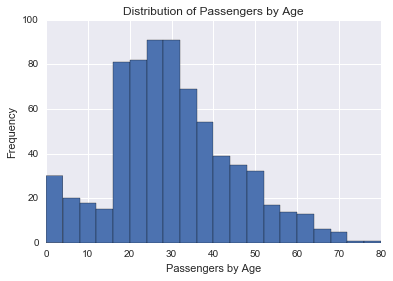

In [70]:
plt.hist(passenger_age_without_na_and_rounded, bins=20)
plt.xlabel('Passengers by Age')
plt.ylabel('Frequency')
plt.title('Distribution of Passengers by Age')
plt.show()

The passengers' ages skew toward young adults (that is, [positive](http://www.cvgs.k12.va.us/digstats/main/descriptv/d_skewd.html)), but we have some older outliers.